# Coding Temple's Data Analytics Course
---
## Python for Data Analysis: Working with APIs and Web Scraping

## What is an API?

API stands for Application Programming Interface. API's are a way for two applications to communicate to one another and are commonly used to retrieve and send data using code. An API follows this format: ![](https://www.altexsoft.com/media/2019/06/1.png)


The API exists with constant communication between the server and the internet. When we create our application, or the web app in browser, we make a requests to that API through the internet for information and the API responds with that data, if we are allowed to access it.

Another way to think of it could be: 

![](https://images.ctfassets.net/wqwerb01q4v1/5KgFJ5hSoJqT5NPkfOI0Fb/2bf6e6d5776c91ce5f2cc6ca1eb40dd0/How_Do_APIs_Work_5.png)


To talk to the API, we need to import a package called `requests` to handle the connection and communication for us. We also will want to import a package called `json` to work with the data that is returned by the API. 

In [1]:
import requests, json

In [ ]:
# all apis are set up in different ways, read them before scripting for them

In [ ]:
url = 'http://ergast.com/api/f1/2008/5/driverStandings.json'

We will be connecting to the Ergast F1 Racer API today. You can look at the API docs here:
http://ergast.com/mrd/



In [6]:
url = 'http://ergast.com/api/f1/2008/5/driverStandings.json'

In [7]:
standing = requests.get(url)

In [11]:
standing.ok

True

In [12]:
#json files are all nested dictionaries
standing.json()

{'MRData': {'xmlns': 'http://ergast.com/mrd/1.5',
  'series': 'f1',
  'url': 'http://ergast.com/api/f1/2008/5/driverstandings.json',
  'limit': '30',
  'offset': '0',
  'total': '22',
  'StandingsTable': {'season': '2008',
   'round': '5',
   'StandingsLists': [{'season': '2008',
     'round': '5',
     'DriverStandings': [{'position': '1',
       'positionText': '1',
       'points': '35',
       'wins': '2',
       'Driver': {'driverId': 'raikkonen',
        'permanentNumber': '7',
        'code': 'RAI',
        'url': 'http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C3%B6nen',
        'givenName': 'Kimi',
        'familyName': 'Räikkönen',
        'dateOfBirth': '1979-10-17',
        'nationality': 'Finnish'},
       'Constructors': [{'constructorId': 'ferrari',
         'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari',
         'name': 'Ferrari',
         'nationality': 'Italian'}]},
      {'position': '2',
       'positionText': '2',
       'points': '28',
       'wins': '2',
 

In [23]:
#how to get drivers names?

standings_list = standing.json()['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']

for i in standings_list:
    print(i['Driver']['givenName'],i['Driver']['familyName'])

full_names = [i['Driver']['givenName'] +" "+ i['Driver']['familyName'] for i in standings_list]

full_names

Kimi Räikkönen
Felipe Massa
Lewis Hamilton
Robert Kubica
Nick Heidfeld
Heikki Kovalainen
Mark Webber
Fernando Alonso
Jarno Trulli
Nico Rosberg
Kazuki Nakajima
Jenson Button
Sébastien Bourdais
David Coulthard
Timo Glock
Giancarlo Fisichella
Rubens Barrichello
Nelson Piquet Jr.
Takuma Sato
Anthony Davidson
Adrian Sutil
Sebastian Vettel


['Kimi Räikkönen',
 'Felipe Massa',
 'Lewis Hamilton',
 'Robert Kubica',
 'Nick Heidfeld',
 'Heikki Kovalainen',
 'Mark Webber',
 'Fernando Alonso',
 'Jarno Trulli',
 'Nico Rosberg',
 'Kazuki Nakajima',
 'Jenson Button',
 'Sébastien Bourdais',
 'David Coulthard',
 'Timo Glock',
 'Giancarlo Fisichella',
 'Rubens Barrichello',
 'Nelson Piquet Jr.',
 'Takuma Sato',
 'Anthony Davidson',
 'Adrian Sutil',
 'Sebastian Vettel']

In [31]:
#create a function to get all info from a racer:

def get_racer_info(data):
    """input: response object from ergast api
    the magic: takes the response and creates a dict of info we want to know
    output: list object containing dict objects
    """
    new_data = []
    for racer in data:  #data is subsetted down to driver objects
        racer_dict = {} 
        racer_name = f'{racer["Driver"]["givenName"]} {racer["Driver"]["familyName"]}'
        # dictionary key will be full name of driver, and within that key will be a dictionary of the keys below.
        racer_dict[racer_name] = { 
            'first_name' : racer['Driver']['givenName'],
            'last_name' :  racer['Driver']['familyName'],
            'wins': racer['wins'],
            'constructor': racer['Constructors'][0]['name']
            #etc
        }
        new_data.append(racer_dict)
    return new_data

print(get_racer_info(standings_list))

[{'Kimi Räikkönen': {'first_name': 'Kimi', 'last_name': 'Räikkönen', 'wins': '2', 'constructor': 'Ferrari'}}, {'Felipe Massa': {'first_name': 'Felipe', 'last_name': 'Massa', 'wins': '2', 'constructor': 'Ferrari'}}, {'Lewis Hamilton': {'first_name': 'Lewis', 'last_name': 'Hamilton', 'wins': '1', 'constructor': 'McLaren'}}, {'Robert Kubica': {'first_name': 'Robert', 'last_name': 'Kubica', 'wins': '0', 'constructor': 'BMW Sauber'}}, {'Nick Heidfeld': {'first_name': 'Nick', 'last_name': 'Heidfeld', 'wins': '0', 'constructor': 'BMW Sauber'}}, {'Heikki Kovalainen': {'first_name': 'Heikki', 'last_name': 'Kovalainen', 'wins': '0', 'constructor': 'McLaren'}}, {'Mark Webber': {'first_name': 'Mark', 'last_name': 'Webber', 'wins': '0', 'constructor': 'Red Bull'}}, {'Fernando Alonso': {'first_name': 'Fernando', 'last_name': 'Alonso', 'wins': '0', 'constructor': 'Renault'}}, {'Jarno Trulli': {'first_name': 'Jarno', 'last_name': 'Trulli', 'wins': '0', 'constructor': 'Toyota'}}, {'Nico Rosberg': {'fir

## In-Class Exercise:

Create a function that allows a user to see a specific year and round

In [40]:
# url = 'http://ergast.com/api/f1/2008/5/driverStandings.json'

def get_year_round(year:int, r:int):
    '''
    input: year -> int, round: int
    how it works: given variables inform api request which season and round to query for
    output: list of custom formatted dictionaries with information for each driver that participated in the round
    '''
    url = f'http://ergast.com/api/f1/{year}/{r}/driverStandings.json'

    standing = requests.get(url)
    
    #set up a base case:
    if not standing.json()['MRData']['StandingsTable']['StandingsLists']:
        return "inputs out of range, try again with better numbers"
    
    standings_list = standing.json()['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']
    return get_racer_info(standings_list)


standings = get_year_round(2022,11)



print(standings)



[{'Max Verstappen': {'first_name': 'Max', 'last_name': 'Verstappen', 'wins': '6', 'constructor': 'Red Bull'}}, {'Charles Leclerc': {'first_name': 'Charles', 'last_name': 'Leclerc', 'wins': '3', 'constructor': 'Ferrari'}}, {'Sergio Pérez': {'first_name': 'Sergio', 'last_name': 'Pérez', 'wins': '1', 'constructor': 'Red Bull'}}, {'Carlos Sainz': {'first_name': 'Carlos', 'last_name': 'Sainz', 'wins': '1', 'constructor': 'Ferrari'}}, {'George Russell': {'first_name': 'George', 'last_name': 'Russell', 'wins': '0', 'constructor': 'Mercedes'}}, {'Lewis Hamilton': {'first_name': 'Lewis', 'last_name': 'Hamilton', 'wins': '0', 'constructor': 'Mercedes'}}, {'Lando Norris': {'first_name': 'Lando', 'last_name': 'Norris', 'wins': '0', 'constructor': 'McLaren'}}, {'Esteban Ocon': {'first_name': 'Esteban', 'last_name': 'Ocon', 'wins': '0', 'constructor': 'Alpine F1 Team'}}, {'Valtteri Bottas': {'first_name': 'Valtteri', 'last_name': 'Bottas', 'wins': '0', 'constructor': 'Alfa Romeo'}}, {'Fernando Alons

## API's Part 2: Connecting to an API and returning an image

### Imports

In [4]:
# https://scryfall.com/docs/api

# 2-stage requests
import pandas as pd # transforming requets into data frames
from PIL import Image # displaying images in python
from io import BytesIO #decrypt byte strings into normal strings


### Connect to the API

In [8]:
api_url = 'https://api.scryfall.com/bulk-data'

# send a get request and save to a response variable

response = requests.get(api_url)

pd.DataFrame.from_dict(response.json()['data']) # data was already a top level key in the json file -> outermost was dict, then came list

# wee can see the top row has a URi associated with it

response2 = requests.get(pd.DataFrame.from_dict(response.json()['data'])['download_uri'][0])

return_frame = pd.DataFrame.from_dict(response2.json())

return_frame.head()


object                                    id  \
0   card  86bf43b1-8d4e-4759-bb2d-0b2e03ba7012   
1   card  7050735c-b232-47a6-a342-01795bfd0d46   
2   card  e718b21b-46d1-4844-985c-52745657b1ac   
3   card  036ef8c9-72ac-46ce-af07-83b79d736538   
4   card  b125d1e7-5d9b-4997-88b0-71bdfc19c6f2   

                              oracle_id multiverse_ids  mtgo_id  mtgo_foil_id  \
0  0004ebd0-dfd6-4276-b4a6-de0003e94237        [15862]  15870.0       15871.0   
1  0006faf6-7a61-426c-9034-579f2cfcfa83       [370780]  49283.0       49284.0   
2  0007c283-5b7a-4c00-9ca1-b455c8dff8c3       [470580]  77122.0           NaN   
3  000d5588-5a4c-434e-988d-396632ade42c        [83282]  22609.0       22610.0   
4  000e5d65-96c3-498b-bd01-72b1a1991850        [12380]  12637.0       12638.0   

   tcgplayer_id  cardmarket_id                 name lang  ... produced_mana  \
0        3094.0         3081.0           Static Orb   en  ...           NaN   
1       69965.0       262945.0  Sensory Deprivation   en  ...           NaN   
2      196536.0       391692.0       Road of Return   en  ...           NaN   
3       12835.0        12551.0           Storm Crow   en  ...           NaN   
4        6412.0        10604.0       Walking Sponge   en  ...           NaN   

  card_faces tcgplayer_etched_id promo_types  loyalty life_modifier  \
0        NaN                 NaN         NaN      NaN           NaN   
1        NaN                 NaN         NaN      NaN           NaN   
2        NaN                 NaN         NaN      NaN           NaN   
3        NaN                 NaN         NaN      NaN           NaN   
4        NaN                 NaN         NaN      NaN           NaN   

  hand_modifier attraction_lights  color_indicator content_warning  
0           NaN               NaN              NaN             NaN  
1           NaN               NaN              NaN             NaN  
2           NaN               NaN              NaN             NaN  
3           NaN               NaN              NaN             NaN  
4           NaN               NaN              NaN             NaN  

[5 rows x 80 columns]

### Return an Image object

In [9]:
norm_img = return_frame['image_uris'][return_frame['name']== 'Static Orb'][0]['normal']



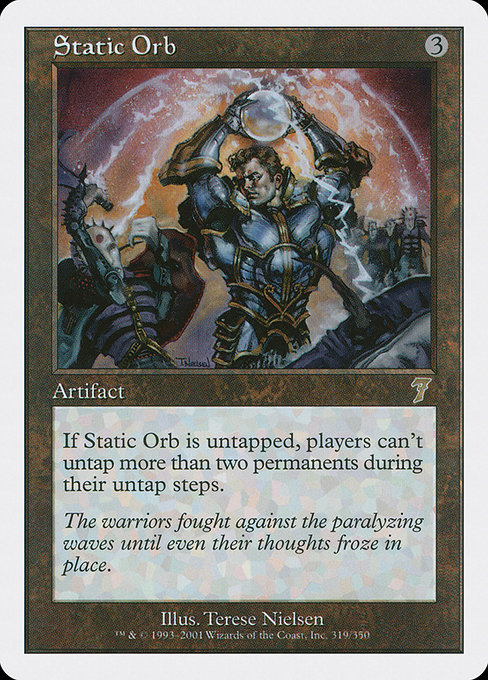

In [13]:
response = requests.get(norm_img)

response.content  # brings bck byte string : b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x0

byte_object = BytesIO(response.content) # makes a successfull byte object

Image.open(byte_object)  #image from pillow import


### Requests

In [ ]:
# requests module was imported at top of notebook

### Importing

In [5]:
from bs4 import BeautifulSoup

### Using Requests

In [64]:
page = requests.get('https://www.cs.cmu.edu/~rgs/alice-VII.html')

In [65]:
page.content  # returns byte string of page's html



b'<HTML>\n<HEAD>\n<Title>Alice\'s Adventures in Wonderland -- Chapter VII</Title>\n</HEAD>\n<BODY>\n<A NAME="PREV" HREF="alice-VI.html">Previous chapter:  Pig and Pepper</A><P>\n<H2>CHAPTER VII</H2>\n                         <H2>A Mad Tea-Party</H2>\n  There was a table set out under a tree in front of the house,\nand the March Hare and the Hatter were having tea at it:  a\nDormouse was sitting between them, fast asleep, and the other two\nwere using it as a cushion, resting their elbows on it, and talking\nover its head.  `Very uncomfortable for the Dormouse,\' thought Alice;\n`only, as it\'s asleep, I suppose it doesn\'t mind.\'\n<P>\n  The table was a large one, but the three were all crowded\ntogether at one corner of it:  `No room!  No room!\' they cried\nout when they saw Alice coming.  `There\'s <I>plenty</I> of room!\' said\nAlice indignantly, and she sat down in a large arm-chair at one\nend of the table.\n<P>\n<A HREF="alice25a.gif" target="picture"><IMG SRC="alice25th.gif"><

#### .content()

## Beautiful Soup

### Importing

### Using Beautiful Soup

In [67]:
soup = BeautifulSoup(page.content, 'html.parser')


<html>
<head>
<title>Alice's Adventures in Wonderland -- Chapter VII</title>
</head>
<body>
<a href="alice-VI.html" name="PREV">Previous chapter:  Pig and Pepper</a><p>
<h2>CHAPTER VII</h2>
<h2>A Mad Tea-Party</h2>
  There was a table set out under a tree in front of the house,
and the March Hare and the Hatter were having tea at it:  a
Dormouse was sitting between them, fast asleep, and the other two
were using it as a cushion, resting their elbows on it, and talking
over its head.  `Very uncomfortable for the Dormouse,' thought Alice;
`only, as it's asleep, I suppose it doesn't mind.'
<p>
  The table was a large one, but the three were all crowded
together at one corner of it:  `No room!  No room!' they cried
out when they saw Alice coming.  `There's <i>plenty</i> of room!' said
Alice indignantly, and she sat down in a large arm-chair at one
end of the table.
<p>
<a href="alice25a.gif" target="picture"><img src="alice25th.gif"/></a>
<b>Mad Tea Party</b>
<p>
  `Have some wine,' the Ma

### .prettify()

In [69]:
# only works oon whiole document and .find() method

soup.prettify()

'<html>\n <head>\n  <title>\n   Alice\'s Adventures in Wonderland -- Chapter VII\n  </title>\n </head>\n <body>\n  <a href="alice-VI.html" name="PREV">\n   Previous chapter:  Pig and Pepper\n  </a>\n  <p>\n   <h2>\n    CHAPTER VII\n   </h2>\n   <h2>\n    A Mad Tea-Party\n   </h2>\n   There was a table set out under a tree in front of the house,\nand the March Hare and the Hatter were having tea at it:  a\nDormouse was sitting between them, fast asleep, and the other two\nwere using it as a cushion, resting their elbows on it, and talking\nover its head.  `Very uncomfortable for the Dormouse,\' thought Alice;\n`only, as it\'s asleep, I suppose it doesn\'t mind.\'\n   <p>\n    The table was a large one, but the three were all crowded\ntogether at one corner of it:  `No room!  No room!\' they cried\nout when they saw Alice coming.  `There\'s\n    <i>\n     plenty\n    </i>\n    of room!\' said\nAlice indignantly, and she sat down in a large arm-chair at one\nend of the table.\n    <p>\n  

### Converting to a List

In [70]:
print(list(soup.children)) # len 2: html group and empty string (/n at the end)


[<html>
<head>
<title>Alice's Adventures in Wonderland -- Chapter VII</title>
</head>
<body>
<a href="alice-VI.html" name="PREV">Previous chapter:  Pig and Pepper</a><p>
<h2>CHAPTER VII</h2>
<h2>A Mad Tea-Party</h2>
  There was a table set out under a tree in front of the house,
and the March Hare and the Hatter were having tea at it:  a
Dormouse was sitting between them, fast asleep, and the other two
were using it as a cushion, resting their elbows on it, and talking
over its head.  `Very uncomfortable for the Dormouse,' thought Alice;
`only, as it's asleep, I suppose it doesn't mind.'
<p>
  The table was a large one, but the three were all crowded
together at one corner of it:  `No room!  No room!' they cried
out when they saw Alice coming.  `There's <i>plenty</i> of room!' said
Alice indignantly, and she sat down in a large arm-chair at one
end of the table.
<p>
<a href="alice25a.gif" target="picture"><img src="alice25th.gif"/></a>
<b>Mad Tea Party</b>
<p>
  `Have some wine,' the M

### Extracting Beautiful Soup Elements

In [71]:
[type(item) for item in list(soup.children)]

# BS sees that the main object is encapsulated in a tag, and the /n is a 'navigable string'

[bs4.element.Tag, bs4.element.NavigableString]

### Assinging Variables from Beautiful Soup

In [83]:
html = list(soup.children)[0]

body = list(html.children)[3] # selecting body element from html object

story = list(body.children)[2] # selecting the main contents from within the body

table = list(story.children)[5]

### .find() <br>
<p>Find a specific instance of the parameter passed in</p>

In [84]:
table.find('p') #<=== finds the matching tags, returns the first result

<p>
<a href="alice25a.gif" target="picture"><img src="alice25th.gif"/></a>
<b>Mad Tea Party</b>
<p>
  `Have some wine,' the March Hare said in an encouraging tone.
<p>
  Alice looked all round the table, but there was nothing on it
but tea.  `I don't see any wine,' she remarked.
<p>
  `There isn't any,' said the March Hare.
<p>
  `Then it wasn't very civil of you to offer it,' said Alice
angrily.
<p>
  `It wasn't very civil of you to sit down without being
invited,' said the March Hare.
<p>
  `I didn't know it was <i>your</i> table,' said Alice; `it's laid for a
great many more than three.'
<p>
  `Your hair wants cutting,' said the Hatter.  He had been
looking at Alice for some time with great curiosity, and this was
his first speech.
<p>
  `You should learn not to make personal remarks,' Alice said
with some severity; `it's very rude.'
<p>
  The Hatter opened his eyes very wide on hearing this; but all
he <i>said</i> was, `Why is a raven like a writing-desk?'
<p>
  `Come, we shall hav

### .find_all() <br>
<p>Similar to .find(), except this will return all of them instead of one</p>

In [87]:
text_corpus = []

for node in table.find_all('b'):
    text_corpus.append(node.get_text()) # to return only whats inside
    
text_corpus

['Mad Tea Party',
 'Hatter engaging in rhetoric',
 'Hatter and Hare dunking Dormouse']

## Exercise 
Using the Beautiful Soup library, grab the data from the following link: https://www.nbastuffer.com/2019-2020-nba-player-stats/. After getting the data, display the players name and team inside of a pandas dataframe.

# Bonus Example: Pulling Vegas Odds from PFR.com

<h3> Use this example for further reference</h3>
<p> This is an example that shows what we will get returned back to us when accessing a HTML document with Beautiful Soup</p>

In [88]:
page = requests.get('https://www.pro-football-reference.com/boxscores/201810140nwe.htm')

soup = BeautifulSoup(page.content, 'html.parser')



In [89]:
soup.prettify() # gives full html text of webpage

'<!DOCTYPE html>\n<html class="no-js" data-root="/home/pfr/build" data-version="klecko-" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="ie=edge" http-equiv="x-ua-compatible"/>\n  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">\n   <link href="https://cdn.ssref.net/req/202309261" rel="dns-prefetch"/>\n   <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\n   <script async="true" type="text/javascript">\n    (function() {\n\tvar host = window.location.hostname;\n\tvar element = document.createElement(\'script\');\n\tvar firstScript = document.getElementsByTagName(\'script\')[0];\n\tvar url = \'https://cmp.quantcast.com\'\n\t    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \n\t\t    \'/choice.js?tag_version=V2\');\n\tvar uspTries = 0;\n\tvar uspTriesLimit = 3;\n\telement.async = true;\n\telement.type = \'text/javascript\';\n\telement.src = url;\n\t\n\tfirstScript.parentNode.insertBefore(element, firstScrip

In [ ]:
for section in list(soup.children):
    print(section)
    print('1\n2\n3\n') # break up sections, cout to where you need.



In [91]:
html = list(soup.children)[3]

body = list(html.children)[3]

body


<body class="pfr">
<div id="wrap">
<div id="header" role="banner">
<ul class="notranslate" id="subnav">
<li><a href="https://www.sports-reference.com/?utm_source=pfr&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01_srnav"><svg height="15px" width="20px"><use xlink:href="#ic-sr-pennant"></use></svg> Sports Reference ®</a></li>
<li><a href="https://www.baseball-reference.com/?utm_source=pfr&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01_srnav">Baseball</a></li>
<li class="current"><a href="https://www.pro-football-reference.com/?utm_source=pfr&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01_srnav">Football</a> <a href="https://www.sports-reference.com/cfb/">(college)</a></li>
<li><a href="https://www.basketball-reference.com/?utm_source=pfr&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01_srnav">Basketball</a> <a href="https://www.sports-reference.com/cbb/">(college)</a></li>
<li><a href="https://www.hockey-reference.com/?utm_source=pfr&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01

In [92]:
body.find_all('div') # gives back list

[<div id="wrap">
 <div id="header" role="banner">
 <ul class="notranslate" id="subnav">
 <li><a href="https://www.sports-reference.com/?utm_source=pfr&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01_srnav"><svg height="15px" width="20px"><use xlink:href="#ic-sr-pennant"></use></svg> Sports Reference ®</a></li>
 <li><a href="https://www.baseball-reference.com/?utm_source=pfr&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01_srnav">Baseball</a></li>
 <li class="current"><a href="https://www.pro-football-reference.com/?utm_source=pfr&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01_srnav">Football</a> <a href="https://www.sports-reference.com/cfb/">(college)</a></li>
 <li><a href="https://www.basketball-reference.com/?utm_source=pfr&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01_srnav">Basketball</a> <a href="https://www.sports-reference.com/cbb/">(college)</a></li>
 <li><a href="https://www.hockey-reference.com/?utm_source=pfr&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01_srnav">Hoc

In [94]:
from bs4 import Comment

comments = soup.find_all(string = lambda text:isinstance(text,Comment)) 

for comment in comments:
    comment = BeautifulSoup(str(comment))
    log = comment.find('table', {'id':'game_info'})
    if log:
        print(log)

<table class="suppress_all sortable stats_table" data-cols-to-freeze="0" id="game_info">
<caption>Game Info Table</caption>
<tr class="thead onecell"><td class="right center" colspan="2" data-stat="onecell">Game Info</td></tr>
<tr><th class="center" data-stat="info" scope="row">Won Toss</th><td class="center" data-stat="stat">Chiefs (deferred)</td></tr>
<tr><th class="center" data-stat="info" scope="row">Roof</th><td class="center" data-stat="stat">outdoors</td></tr>
<tr><th class="center" data-stat="info" scope="row">Surface</th><td class="center" data-stat="stat">fieldturf </td></tr>
<tr><th class="center" data-stat="info" scope="row">Duration</th><td class="center" data-stat="stat">3:07</td></tr>
<tr><th class="center" data-stat="info" scope="row">Attendance</th><td class="center" data-stat="stat"><a href="/years/2018/attendance.htm">65,878</a></td></tr>
<tr><th class="center" data-stat="info" scope="row">Weather</th><td class="center" data-stat="stat">45 degrees, no wind</td></tr>


C:\Users\Annie\AppData\Local\Temp\ipykernel_7068\863366263.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  comment = BeautifulSoup(str(comment))
